In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# make a 3-layer neural network, with relu activation and softmax output, dropout on the second layer

# define the network
class Net(torch.nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H1)
        self.linear2 = torch.nn.Linear(H1, H2)
        self.linear3 = torch.nn.Linear(H2, D_out)
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax()
        self.dropout = torch.nn.Dropout(p=0.5)
        self.bn1 = torch.nn.BatchNorm1d(5) # batch normalization
        # torch.nn.init.xavier_uniform_(self.linear1.weight) #weight initialization
        
    def forward(self, x):
        out1 = self.bn1(out1) # batch normalization
        out1 = self.linear1(x).clamp(min=0)
        out1 = self.dropout(out1)
        out2 = self.linear2(out1).clamp(min=0)
        y_pred = self.linear3(out2)
        return self.softmax(y_pred)

In [23]:
# weight decay -> L2 regularization
# L1 regularization is during training
    
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9, weight_decay=5e-4)


In [24]:
# example
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
# This is the code for the neural network model that we will use to classify iris flowers
# It is a feedforward neural network with 3 layers
# The input layer has 4 input nodes and 30 hidden nodes
# The hidden layer has 30 input nodes and 10 hidden nodes
# The output layer has 10 input nodes and 3 output nodes
# The activation function used is the relu function for the first two layers and the softmax function for the output layer
# The loss function used is the cross entropy loss function
# The optimizer used is the Adam optimizer

class irisClassificationFCN(torch.nn.Module):

    def __init__(self, input_dim, output_dim, hidden1_dim, hidden2_dim):
        super(irisClassificationFCN, self).__init__()
        self.layer1 = torch.nn.Linear(input_dim, hidden1_dim) # input layer
        self.layer2 = torch.nn.Linear(hidden1_dim, hidden2_dim) # hidden layer
        self.layer3 = torch.nn.Linear(hidden2_dim, output_dim) # output layer
    
    def forward(self, x):
        out1 = torch.nn.functional.relu(self.layer1(x)) # pass through first layer
        out2 = torch.nn.functional.relu(self.layer2(out1)) # pass through second layer
        output = torch.nn.functional.softmax(self.layer3(out2), dim=1) # pass through output layer

        return output

# create an instance of the model class
model = irisClassificationFCN(4, 3, 30, 10)

# define the learning rate, epochs, loss function, and optimizer
learning_rate = 0.025
epochs = 25

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# print the model
model

irisClassificationFCN(
  (layer1): Linear(in_features=4, out_features=30, bias=True)
  (layer2): Linear(in_features=30, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=3, bias=True)
)

In [32]:
train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))

In [33]:
import tqdm

train_inputs = (X_train).float()
train_targets = (y_train).long()

validation_inputs = (X_test).float()
validation_targets = (y_test).long()

testing_inputs = (X_test).float()
testing_targets = (y_test).long()

In [34]:
for epoch in tqdm.trange(epochs):

    optimizer.zero_grad()
    train_outputs = model(train_inputs)
    train_loss = loss_function(train_outputs, train_targets)
    train_loss_list[epoch] = train_loss.item()
    train_loss.backward()
    optimizer.step()

    # compute validation accuracy
    with torch.no_grad():
        validation_outputs = model(validation_inputs)
        
        correct = (torch.argmax(validation_outputs, dim=1) == validation_targets).type(torch.FloatTensor)
        validation_accuracy_list[epoch] = correct.mean()


100%|██████████| 25/25 [00:00<00:00, 235.72it/s]


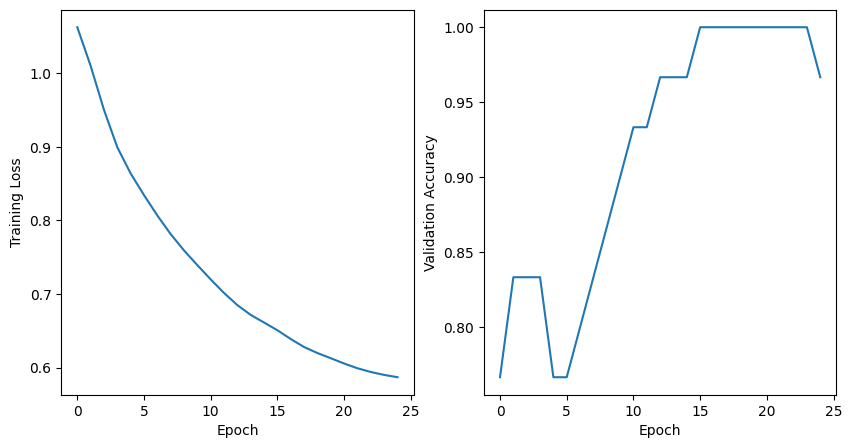

In [35]:
# plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(validation_accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

plt.show()

In [ ]:
# quiz question

#Python code snippet that defines a neural network model class "myModel" with the following specifications. 

# Input layer = 10 neurons

# First hidden layer = 32 neurons, Sigmoid activation 

# Second hidden layer = 16 neurons, Sigmoid activation, Dropout with 30% probability (applied after sigmoid activation)

# Output layer = 5 neurons, Softmax activation

# Define the model

class myModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim, hidden1_dim, hidden2_dim):
        super(myModel, self).__init__()
        self.layer1 = torch.nn.Linear(input_dim, hidden1_dim) # input layer
        self.layer2 = torch.nn.Linear(hidden1_dim, hidden2_dim) # hidden layer
        self.layer3 = torch.nn.Linear(hidden2_dim, output_dim) # output layer
    
    def forward(self, x):
        out1 = torch.nn.functional.sigmoid(self.layer1(x)) # pass through first layer
        out2 = torch.nn.functional.sigmoid(self.layer2(out1)) # pass through second layer
        out2 = torch.nn.functional.dropout(out2, p=0.3)
        output = torch.nn.functional.softmax(self.layer3(out2), dim=1) # pass through output layer

        return output

# create model with desired specifications
model = myModel(input_dim = 10, output_dim = 5, hidden1_dim = 32, hidden2_dim = 16)